#**Breast cancer classification with a simple Neural Network**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection**

In [2]:
# loading the data to a data frame
data = pd.read_csv("/content/breast_cancer.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**Domain Analysis**

Radius, Texture, Perimeter, Area, Smoothness: Describe shape and surface characteristics of the cell nuclei.

Compactness, Concavity, Symmetry, Fractal Dimension: Capture geometric and morphological properties.

Diagnosis: B for Benign, M for Malignant

**Basic checks**

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
data.shape

(569, 33)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#**Exploratory data analysis**

/tmp/ipython-input-2966179419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='viridis')


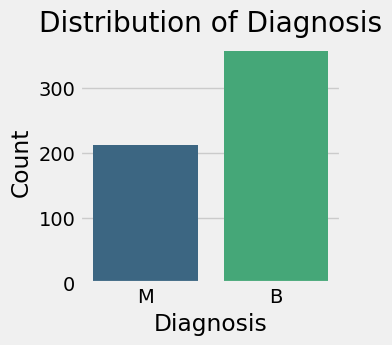

In [8]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(3, 3))
sns.countplot(x='diagnosis', data=data, palette='viridis')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# **Data preprocessing**

In [9]:
# check null values
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
# Remove unnecessary columns
data.drop(columns=['id','Unnamed: 32'], axis=1,inplace=True)

In [12]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# checking the distribution of Target Varibale
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [14]:
# handling categorical data using manual encoding
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

In [15]:
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


**Insights**


1.   No missing Values in data
2.   mean is slightly more than the median for  the features.so it is right skewed.
3.   Data is imabalance.
2.   mean of most features the clearly larger for malignant cases compared to the benign cases.





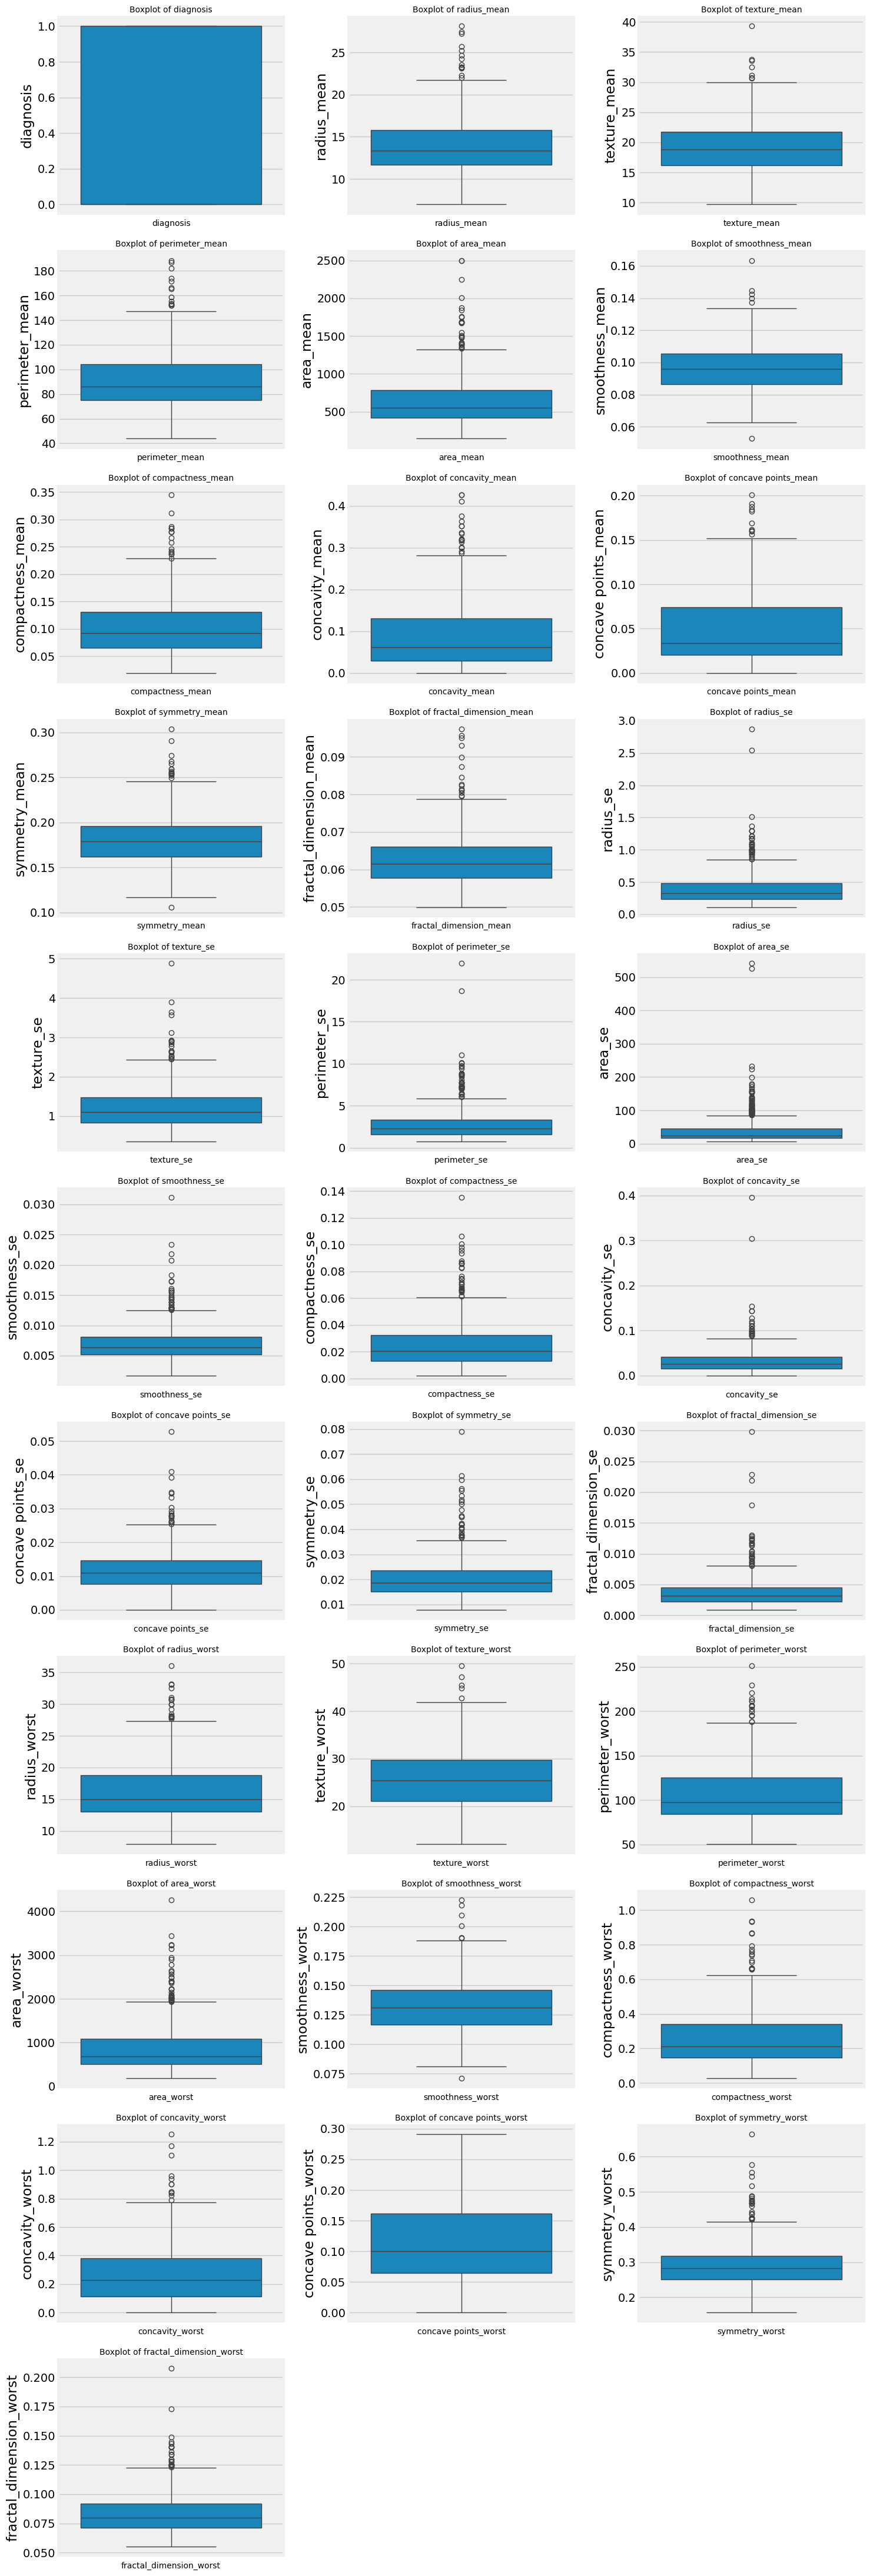

In [16]:
# Detecting outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of columns in your dataset
num_columns =31

# Define number of columns per row
cols = 3

# Calculate number of rows needed
rows = math.ceil(num_columns / cols)

plt.figure(figsize=(5 * cols, 4 * rows), facecolor='white')
plotnumber = 1

for column in data.columns:
    ax = plt.subplot(rows, cols, plotnumber)
    sns.boxplot(y=data[column], ax=ax)
    ax.set_xlabel(column, fontsize=10)
    ax.set_title(f'Boxplot of {column}', fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [17]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
# Handling outlier
from scipy import stats
columns=['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst',
'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']
for col in columns:
    IQR=stats.iqr(data[col],interpolation='midpoint')
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    print(f"\nColumn: {col}")
    print("Q1:",Q1)
    print("Q3:",Q3)
    print("lowe_limit:",lb)
    print("upper_limit:",ub)
    print("length of outliers:",len(data.loc[(data[col]>ub)|(data[col]<lb)]))
     # Replace outliers with median
    median_val = np.median(data[col])
    data.loc[(data[col] > ub) | (data[col] < lb), col] = median_val
    print(len(data.loc[(data[col]>ub)|(data[col]<lb)]))
    print("*******************************")



Column: radius_mean
Q1: 11.7
Q3: 15.78
lowe_limit: 5.579999999999999
upper_limit: 21.9
length of outliers: 14
0
*******************************

Column: texture_mean
Q1: 16.17
Q3: 21.8
lowe_limit: 7.725000000000003
upper_limit: 30.244999999999997
length of outliers: 7
0
*******************************

Column: perimeter_mean
Q1: 75.17
Q3: 104.1
lowe_limit: 31.775000000000013
upper_limit: 147.49499999999998
length of outliers: 13
0
*******************************

Column: area_mean
Q1: 420.3
Q3: 782.7
lowe_limit: -123.30000000000001
upper_limit: 1326.3000000000002
length of outliers: 25
0
*******************************

Column: smoothness_mean
Q1: 0.08637
Q3: 0.1053
lowe_limit: 0.057975
upper_limit: 0.133695
length of outliers: 6
0
*******************************

Column: compactness_mean
Q1: 0.06492
Q3: 0.1304
lowe_limit: -0.03329999999999997
upper_limit: 0.22861999999999996
length of outliers: 16
0
*******************************

Column: concavity_mean
Q1: 0.02956
Q3: 0.1307
lowe_l

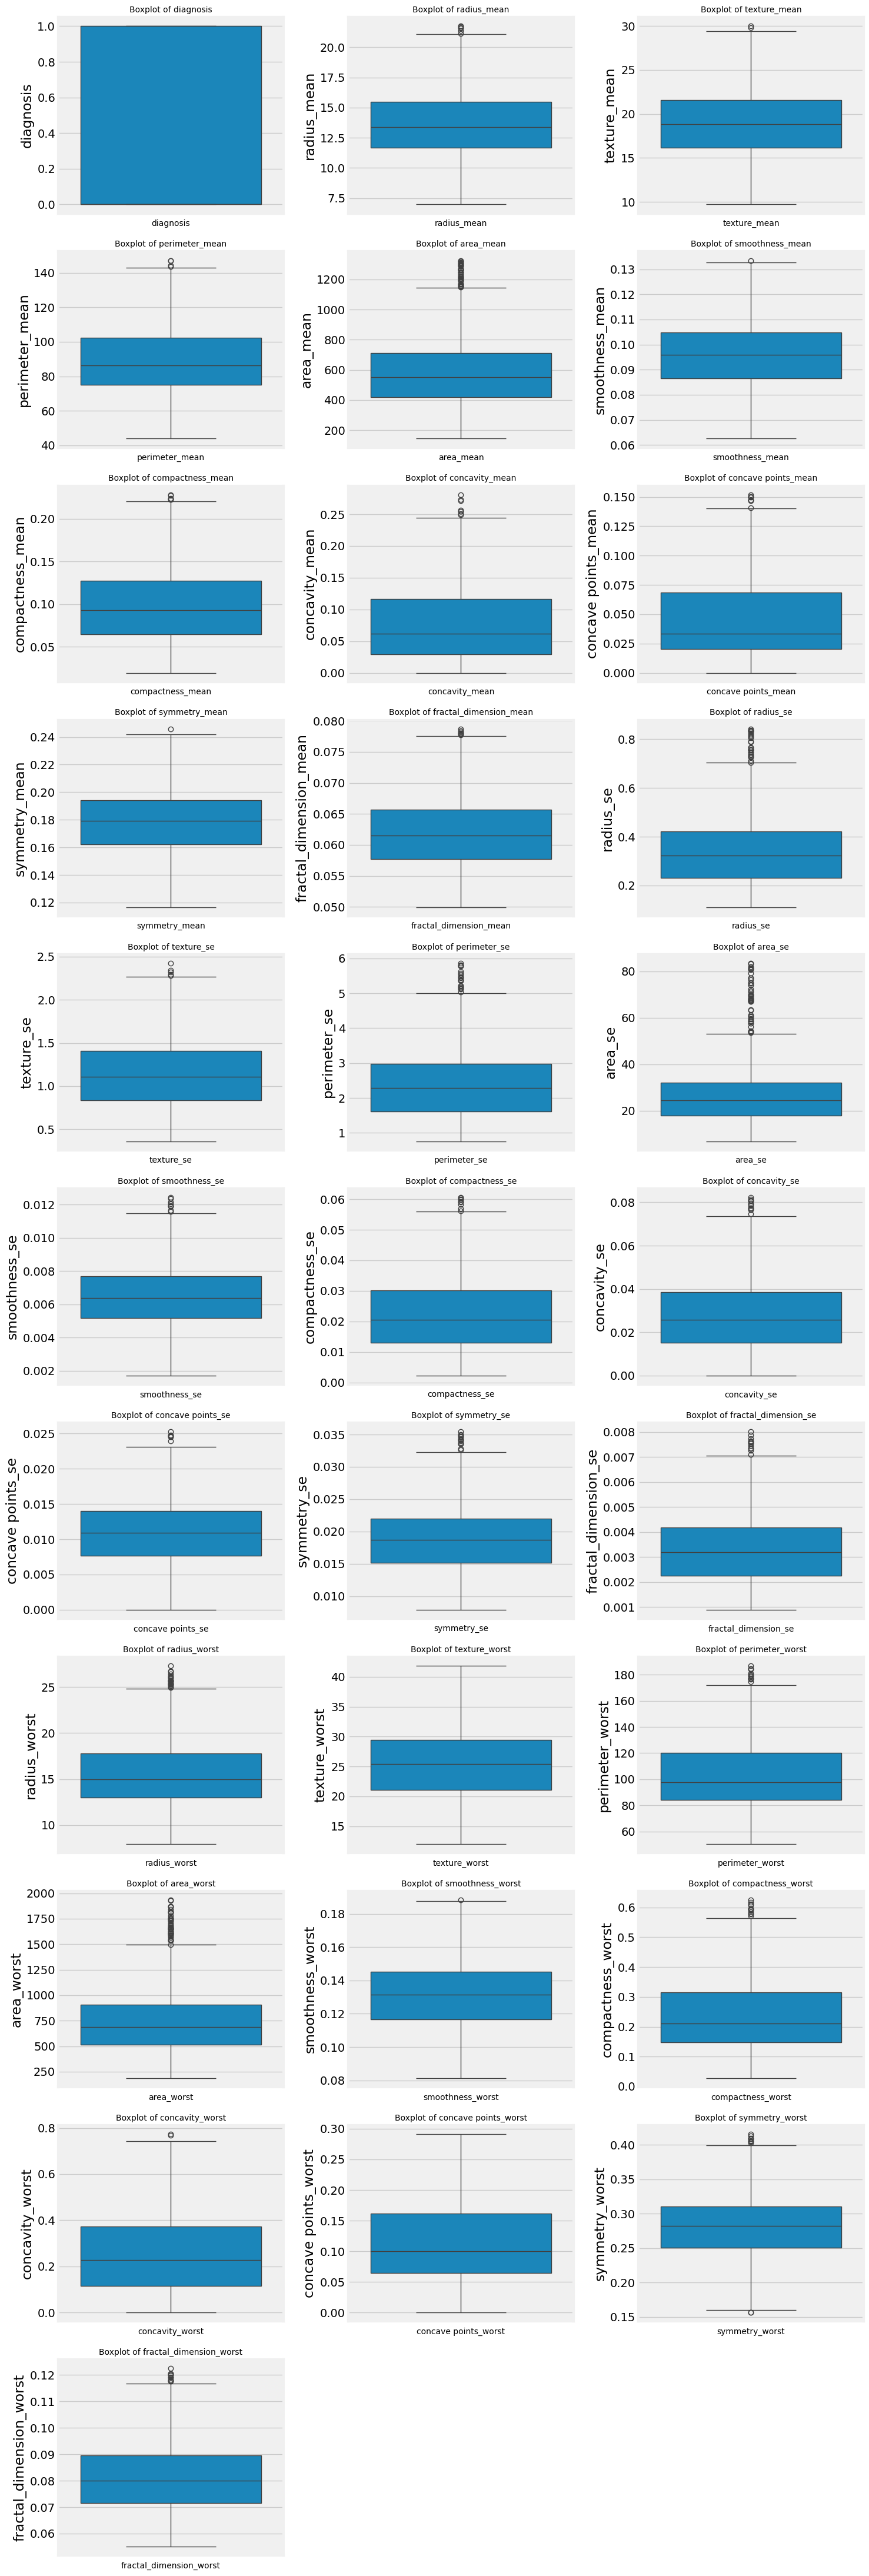

In [19]:
# Detecting outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of columns in your dataset
num_columns =31

# Define number of columns per row
cols = 3

# Calculate number of rows needed
rows = math.ceil(num_columns / cols)

plt.figure(figsize=(5 * cols, 4 * rows), facecolor='white')
plotnumber = 1

for column in data.columns:
    ax = plt.subplot(rows, cols, plotnumber)
    sns.boxplot(y=data[column], ax=ax)
    ax.set_xlabel(column, fontsize=10)
    ax.set_title(f'Boxplot of {column}', fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

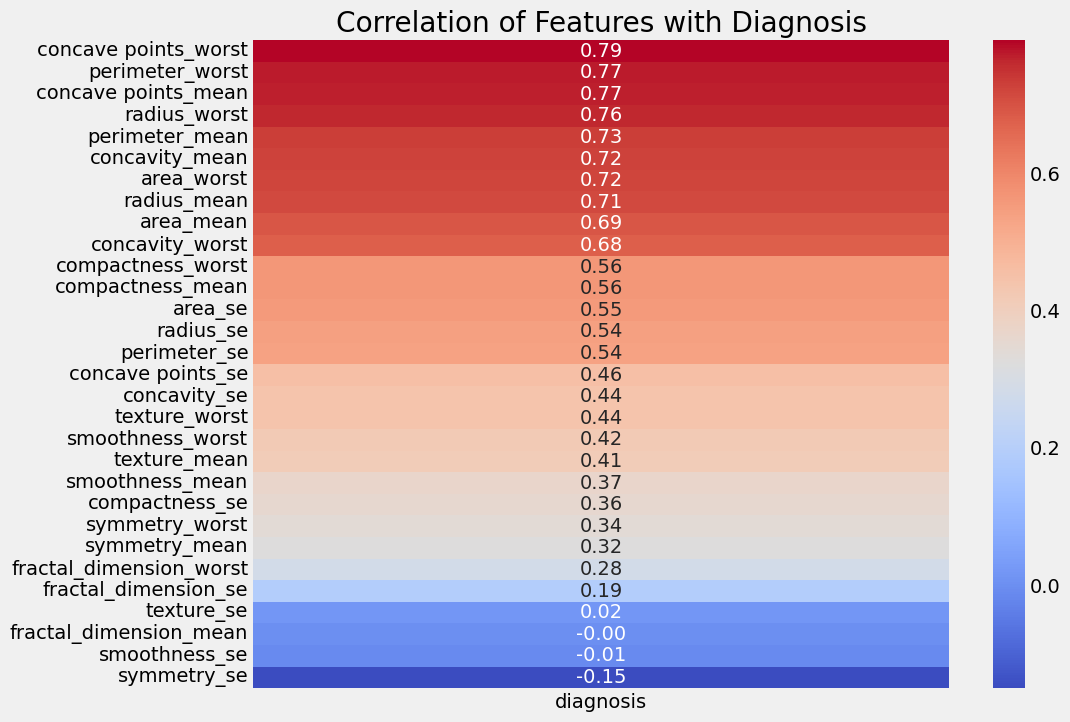

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()

diagnosis_correlation = correlation_matrix['diagnosis'].drop('diagnosis')


diagnosis_correlation_sorted = diagnosis_correlation.sort_values(ascending=False)

sns.heatmap(diagnosis_correlation_sorted.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation of Features with Diagnosis')
plt.show()

**Separating the features and target**

In [21]:
X = data.drop(columns='diagnosis', axis=1)
Y = data['diagnosis']

In [22]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.09587   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00      551.1          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.09587   

     compactness_mean  concavity_mean  concave points_mean  sym

In [23]:
Y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [27]:
# Handling unbalance data
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to training data
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train_std, Y_train)

# Print class distribution before and after SMOTE
print("Actual Classes:", Counter(Y_train))
print("SMOTE Classes:", Counter(Y_train_smote))

Actual Classes: Counter({0: 288, 1: 167})
SMOTE Classes: Counter({0: 288, 1: 288})


#**Model Creation**

In [28]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [29]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),# input layer
                          keras.layers.Dense(20, activation='relu'),# hidden layer
                          keras.layers.Dense(2, activation='sigmoid')# output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #Your target labels are integers, not one-hot encoded.

              metrics=['accuracy'])

In [31]:
# training the Meural Network

history = model.fit(X_train_smote, Y_train_smote, validation_split=0.1, epochs=10)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5903 - loss: 0.6980 - val_accuracy: 0.8448 - val_loss: 0.4476
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7910 - loss: 0.4365 - val_accuracy: 0.8966 - val_loss: 0.3558
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8977 - loss: 0.3052 - val_accuracy: 0.8966 - val_loss: 0.2887
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9418 - loss: 0.2318 - val_accuracy: 0.8966 - val_loss: 0.2385
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9538 - loss: 0.1867 - val_accuracy: 0.9138 - val_loss: 0.2024
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9595 - loss: 0.1575 - val_accuracy: 0.9310 - val_loss: 0.1772
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9614 - loss: 0.1373 - val_accuracy: 0.9310 - val_loss: 0.1596
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9660 - loss: 0.1226 - val_accuracy: 0.9310 - val_loss

# **Visualizing accuracy and loss**

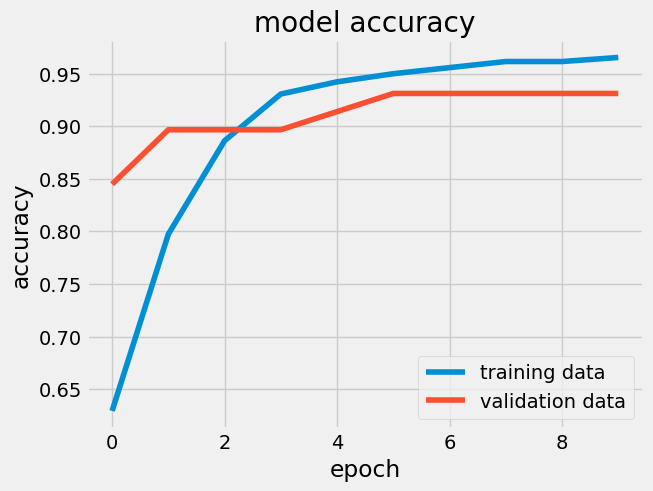

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

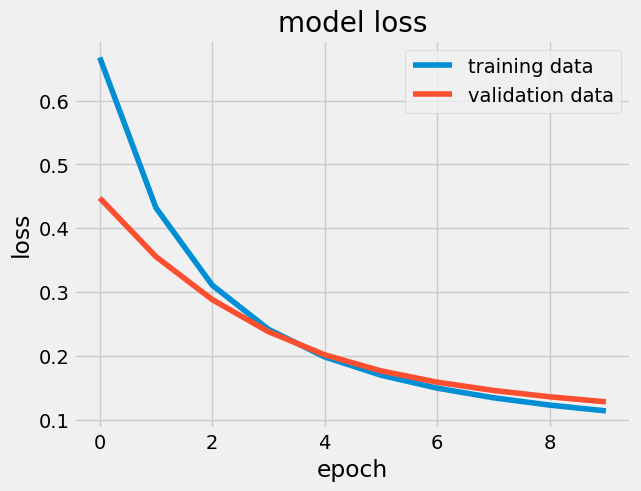

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

**Accuracy of the model on test data**

In [34]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9292 - loss: 0.1351
0.9298245906829834


In [35]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[ 0.04810008 -1.48231467  0.0266983  -0.03131578  2.19834599 -0.03194574
  0.34257975  0.60017785  0.77075646  0.40989067  1.28390945 -0.12229494
  1.54416114  1.16307439  1.7902371   0.77423931  1.12421421 -0.02296818
 -0.38429568  1.51475936 -0.27746602 -1.72699342 -0.3301546  -0.30335552
  0.38056339 -0.79112397 -0.54625837 -0.18278004 -1.43484384 -0.65305508]


In [36]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [37]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.35271138 0.07530028]


In [38]:
print(X_test_std)

[[ 0.04810008 -1.48231467  0.0266983  ... -0.18278004 -1.43484384
  -0.65305508]
 [ 0.38569682 -0.01980084  0.34763215 ...  0.54129749  0.3214173
   0.24994859]
 [-1.36583451 -0.26643049 -1.37022357 ... -1.35138617  0.52945322
  -0.19229357]
 ...
 [ 0.94504828  0.54251477  0.96705357 ...  1.46701686  1.74701082
   1.05887394]
 [ 0.39562614  1.48464003  0.27647271 ... -1.29043534 -2.73780565
  -1.94866904]
 [ 1.07743916 -0.02473343  1.12943082 ...  2.15137705  0.64332552
   0.68626455]]


In [39]:
print(Y_pred)

[[3.5271138e-01 7.5300276e-02]
 [3.7769231e-01 5.0023884e-01]
 [9.5886910e-01 3.4495275e-02]
 [4.0394671e-02 1.4175197e-01]
 [3.9554235e-01 5.1550984e-01]
 [2.0027289e-02 8.9161819e-01]
 [6.2984437e-01 2.1549630e-01]
 [9.8681098e-01 9.8219112e-02]
 [9.0182042e-01 2.0425248e-01]
 [9.6476829e-01 2.9203236e-01]
 [2.3693642e-01 6.3207889e-01]
 [6.4634347e-01 1.1946924e-01]
 [3.7060374e-01 7.8501709e-02]
 [3.8283464e-01 1.4512034e-01]
 [9.5633876e-01 2.6966307e-01]
 [4.2422557e-01 6.4402169e-01]
 [9.4015181e-01 1.3085385e-01]
 [6.8590254e-01 2.5894033e-02]
 [9.4922912e-01 1.1934658e-01]
 [4.0710988e-03 9.4900703e-01]
 [5.8942795e-01 2.0624940e-01]
 [9.1442472e-01 4.9030434e-02]
 [8.9399344e-01 1.6326797e-01]
 [9.8426920e-01 5.9794020e-02]
 [8.7132233e-01 2.9824743e-01]
 [1.8301688e-02 8.6448288e-01]
 [7.5619054e-01 1.6122545e-01]
 [6.5994364e-01 3.5104829e-01]
 [1.7037774e-02 8.5407305e-01]
 [3.2002047e-02 9.2841423e-01]
 [9.2359096e-01 2.9401579e-01]
 [8.6625898e-01 1.9022624e-01]
 [9.2335

model.predict() gives the prediction probability of each class for that data point

In [40]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [41]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0)

**Building the predictive system**

In [42]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.9315362  0.13292533]]
[np.int64(0)]
The tumor is Malignant


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
